# Hard Way vs Pandas 

In [77]:
import os
import json

In [78]:
path = '../datasets/bitly_usagov/example.txt'
os.listdir('../datasets/bitly_usagov')

['example.txt']

In [79]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [80]:
#  
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [81]:
records[0]['tz']

'America/New_York'

In [82]:
# How many timezones are there?
time_zones = [i['tz'] for i in records]
time_zones

KeyError: 'tz'

In [90]:
# So some keys could not be found, meaning some records have no 'tz'
time_zones = [i['tz'] for i in records if 'tz' in i]
len(time_zones)

3440

In [ ]:
# Hard way: Create a few methods  
def get_counts(seq):
    counts = {}
    for i in seq:
        if i in counts:
            counts[i] += 1
        else:
            counts[i] = 1
    #print(counts)
    return counts

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [98]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [99]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

# Please use Pandas!

In [104]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib as plot

In [ ]:
df_records = DataFrame(records)
df_csv = pd.read_csv(path, sep="} ")

In [ ]:
df_records
#df_csv

In [91]:
df_records['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [97]:
# the object "df_records['tz']" has methods, not sure how to show them all..
tz_counts = df_records['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [102]:
# In order to plot data using matplot, substitute empty or unknown 'tz's
tz_clean = df_records['tz'].fillna('Missing')
tz_clean[tz_clean == ''] = 'Unknown'

tz_counts = tz_clean.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

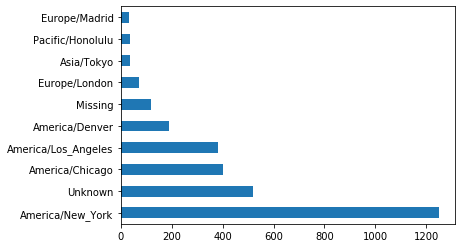

In [108]:
# Let's plot 
tz_counts[:10].plot(kind = 'barh', rot = 0)